In [1]:
import matplotlib
from math import *
from pandas import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os


%matplotlib inline
sns.set(style="darkgrid")

In [2]:
tshark_cmd = 'tshark -T fields -e _ws.col.No. -e _ws.col.Time -e _ws.col.Source -e _ws.col.Destination -e _ws.col.tls_len -e _ws.col.Info -E header=y -E separator="\t" -E quote=d -E occurrence=f -r {} > {}'.format("./lab-pc/trace3/trace3.raw", "./lab-pc/trace3/trace3.csv")  
os.system(tshark_cmd);

In [3]:
pcap_main = read_csv("./lab-pc/trace3/trace3.csv",sep="\t", index_col=None, encoding='utf-8')
pcap_main.rename(index=str, columns={"_ws.col.No.": "No", "_ws.col.Time": "Time","_ws.col.Source": "Source","_ws.col.Destination": "Destination", "_ws.col.tls_len": "tls_len","_ws.col.Info": "Info"}, inplace=True);
pcap_main.head()

No      Time             Source Destination tls_len  \
0   1  0.000000  SuperMic_dc:ba:c7   Broadcast     NaN   
1   2  0.186749      192.168.1.238   10.6.0.11     NaN   
2   3  0.188078      192.168.1.238   10.6.0.11     NaN   
3   4  0.212823      192.168.1.238   10.6.0.11     NaN   
4   5  0.213351      192.168.1.238   10.6.0.11     NaN   

                                                Info  
0          Who has 192.168.1.163? Tell 192.168.1.248  
1            Standard query 0x46e2 A www.netflix.com  
2  Standard query 0xc87e A clientservices.googlea...  
3           Standard query 0xdc35 A mtalk.google.com  
4         Standard query 0xeef7 A www.googleapis.com

In [4]:
# pcap_main = read_csv('./lab-pc/trace3/test.csv', index_col=None, encoding='utf-8')
# pcap_main.head()

In [5]:
pcap_main.shape

(137213, 6)

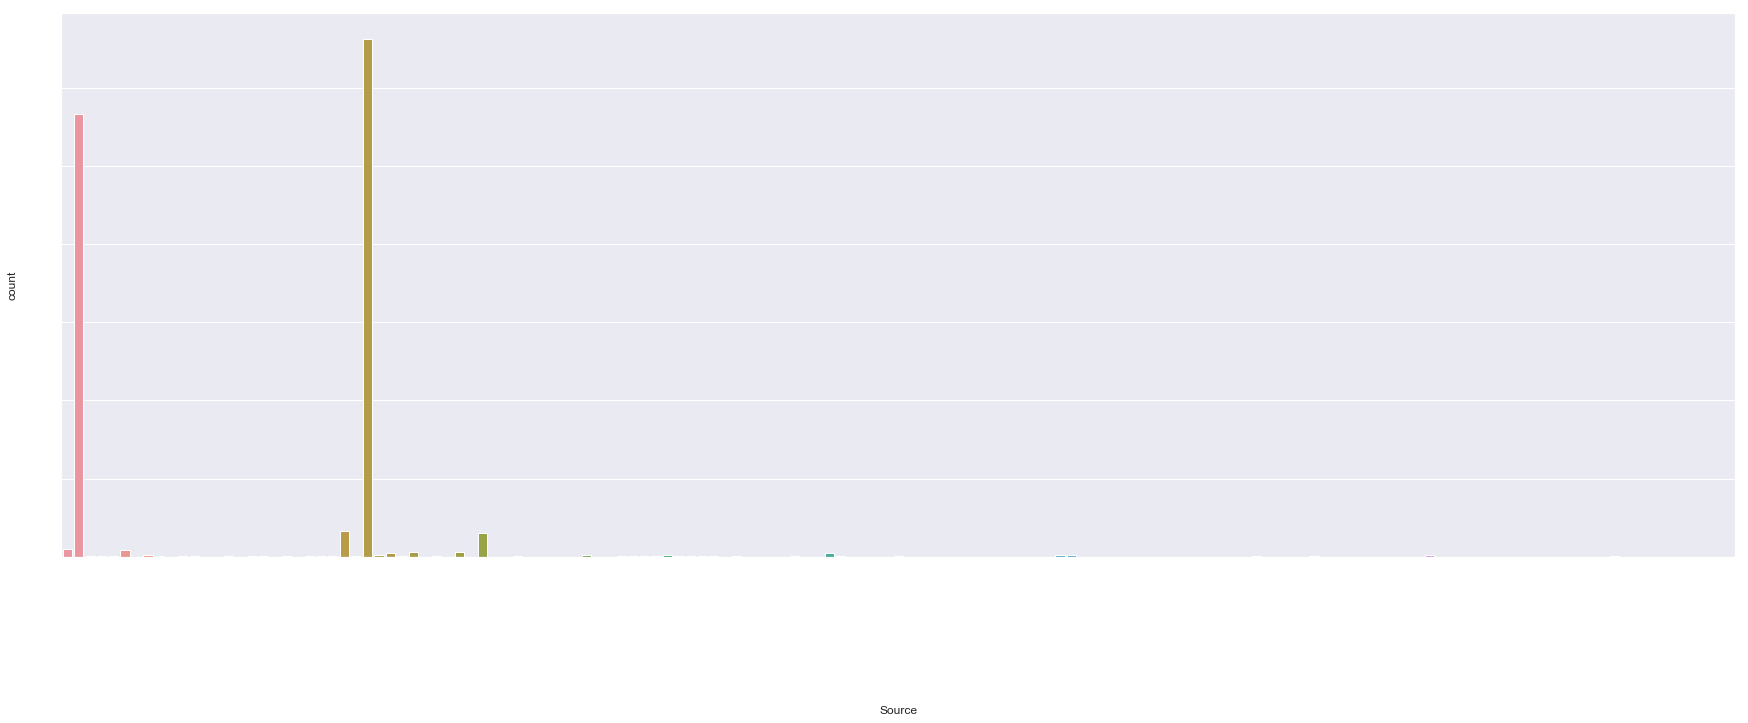

In [6]:
plt.figure(figsize=(30 ,10))
ax = sns.countplot(x="Source", data=pcap_main)
plt.xticks(rotation=90)
plt.rcParams['xtick.labelsize'] = 15
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

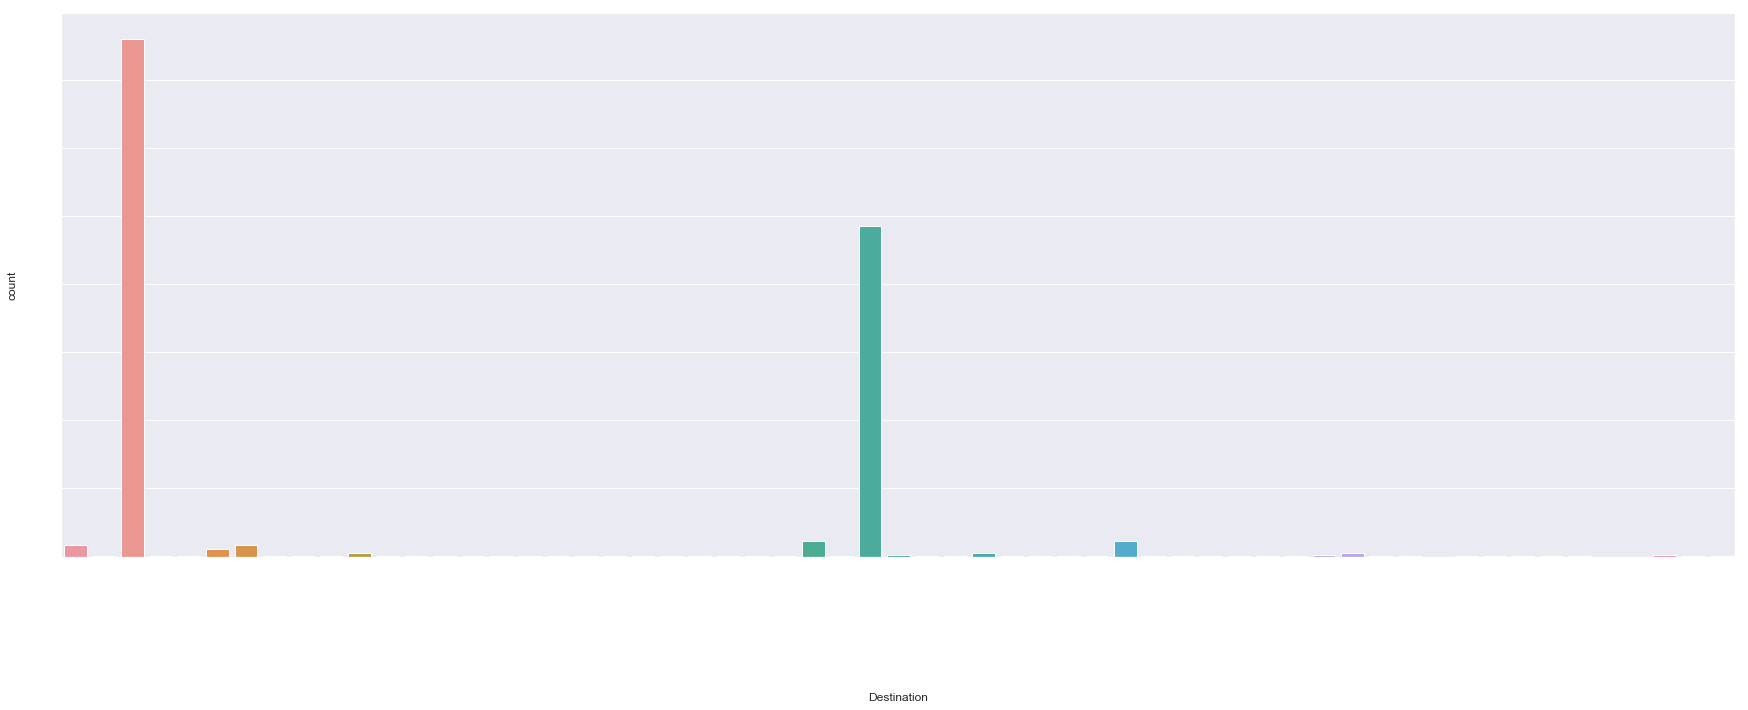

In [7]:
plt.figure(figsize=(30 ,10))
ax = sns.countplot(x="Destination", data=pcap_main)
plt.xticks(rotation=90)
plt.rcParams['xtick.labelsize'] = 15
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

In [8]:
pcap_main['Source'].value_counts().idxmax()

'45.57.51.132'

In [9]:
pcap_main['Destination'].value_counts().idxmax()

'192.168.1.238'

In [10]:
pcap_get = pcap_main[pcap_main['Destination']== '45.57.51.132']

In [11]:
pcap_get.size

290724

In [12]:
pkt_cnt = [0] # number of Packets at i'th sec 
d_time = []  # list of time 
start_time = floor(pcap_get.iloc[0,1]) # start time of the first packet in the list

i = 0
d_time.append(start_time)

for _,packet in pcap_get.iterrows():
    curr_time = floor(packet.Time)
    if curr_time > start_time:
        i += 1
        pkt_cnt.append(0)
        d_time.append(curr_time)
        start_time = curr_time
    pkt_cnt[i]+= 1

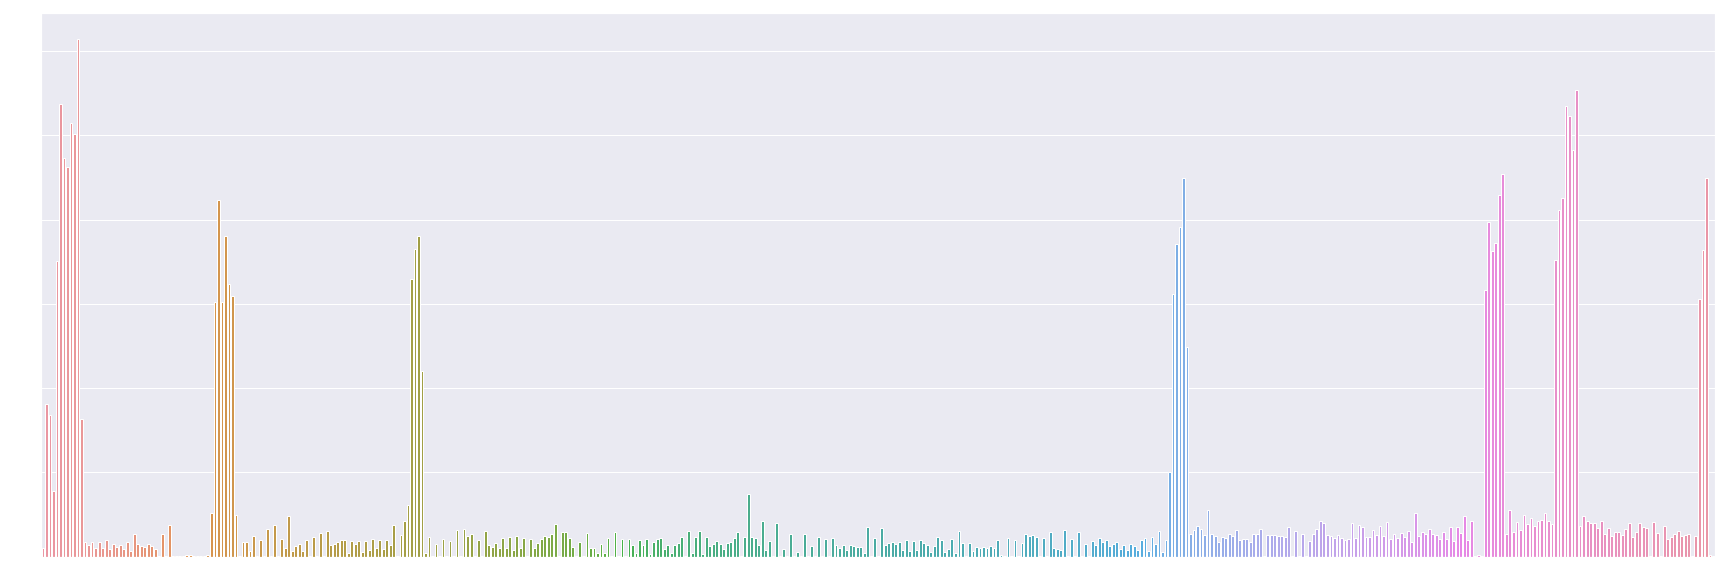

In [13]:
plt.figure(figsize=(30 ,10))
pvt = sns.barplot(data=None, x =d_time, y= pkt_cnt )
plt.xticks(rotation=90)
plt.setp(pvt,xticks=[])
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

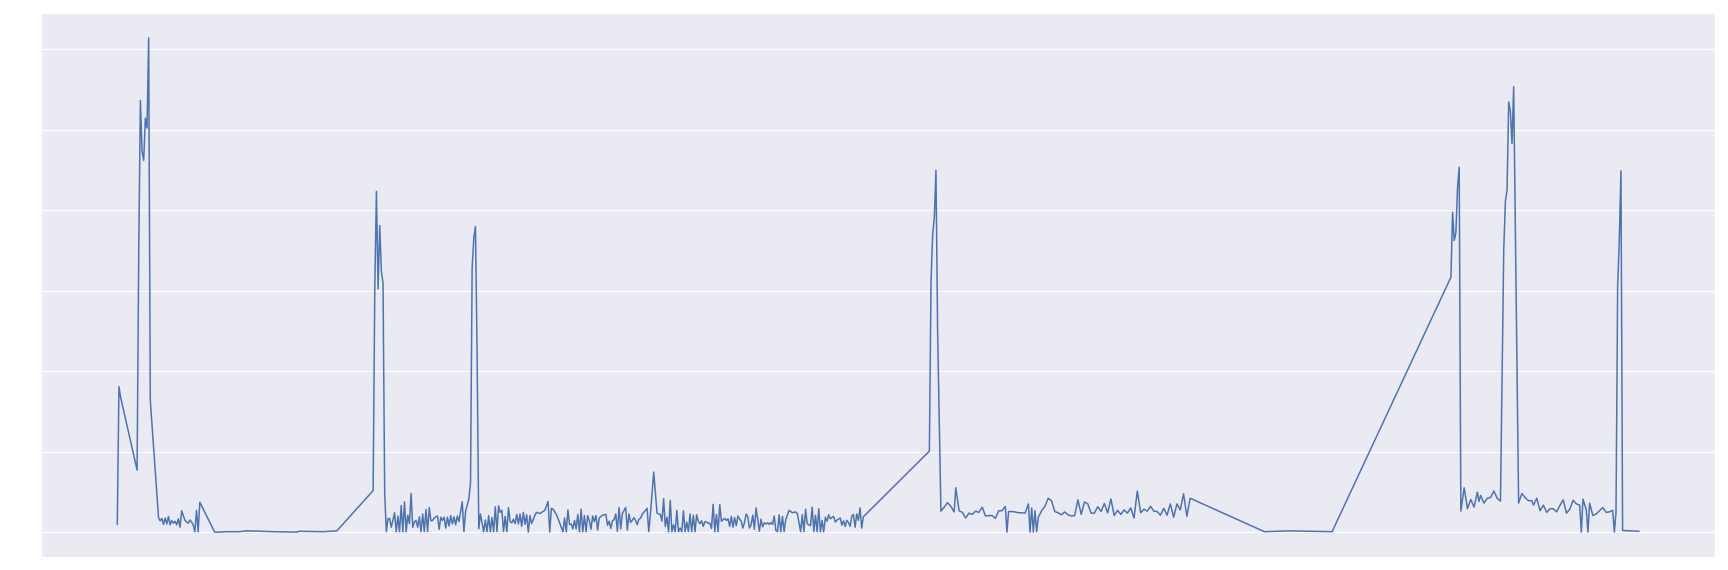

In [14]:
plt.figure(figsize=(30 ,10))
pvt = sns.lineplot(x =d_time, y= pkt_cnt)
plt.xticks(rotation=90)
plt.setp(pvt,xticks=[])
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

In [15]:
# tshark_cmd = 'tshark -T fields -e frame.number -e frame.time_relative -e ip.src -e ip.dst -e _ws.col.tls_len -e _ws.col.Info -E header=y -E separator="\t" -E quote=d -E occurrence=f -r trace3.raw > 1.csv'
# os.system(tshark_cmd)

In [17]:
# csv.rename(index=str, columns={"frame.number": "No", "frame.time_relaative": "Time","ip.src": "Source","ip.dst": "Destination", "_ws.col.tls_len": "tls_len","_ws.col.Info": "Info"}, inplace=True);

In [17]:
# csv.head()

In [18]:
# csv.fillna(-1, inplace=True)
# csv['tls_len'] = csv.tls_len.astype(int, copy=False) # converting the ssllen field to integer type
# filtering to get ssllen in the 6000 to 7000 range.
# temp = temp.query('6000<ssllen<7000')

# filtering to get ssllen in the 6000 to 7000 range.
# csv = csv.query('8000<ssllen<9000')